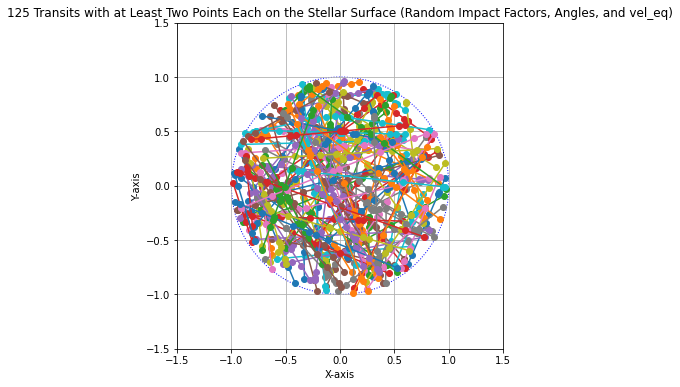

    Angle (radians) Impact Factor  Number of Points
0            0.3124        0.3749                 8
1             1.882        0.1045                 6
2            0.3376        0.8614                 7
3            1.1939        0.2565                 8
4            3.1178        0.7889                 7
..              ...           ...               ...
120          1.5331        0.3608                 8
121          0.8887         0.529                 9
122          2.9161        0.1232                10
123          2.3515        0.8231                 9
124           0.831        0.2001                10

[125 rows x 3 columns]


/projects/anaconda38/envs/py36new/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


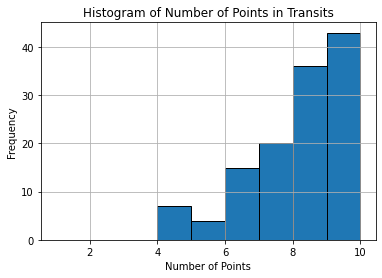

Number of profiles to generate: 973


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Number of transits and points per transit
number_of_transits = 125  # You can change this to the desired number of transits
max_points_per_transit = 10  # You can change this to the desired number of points per transit
min_points_per_transit = 3

# Initialize a list to store transit coordinates
transits = []

# Function to generate a transit with at least two points
def generate_transit():
    transit = []
    # Generate a random impact factor (b) between 0.1 and 0.9 for each transit
    b = round(np.random.uniform(0.1, 0.9), 4)
    
    # Generate a random angle between 0 and π (0 to 180 degrees)
    angle = round(np.random.uniform(0, np.pi), 4)
    
    # Calculate random center coordinates within the unit circle
    center_x, center_y = np.random.uniform(-1, 1, 2)
    
    # Calculate the endpoints of the transit
    x_start = center_x - b
    x_end = center_x + b
    
    # Generate random y-coordinates within the transit and filter out points outside the unit circle
    for _ in range(max_points_per_transit):
        y_coord = np.random.uniform(-1, 1)  # Random y-coordinate within the transit
        x_coord = x_start + (x_end - x_start) * (y_coord + 1) / 2
        
        # Check if the point is within the unit circle
        if x_coord**2 + y_coord**2 <= 1:
            transit.append((x_coord, y_coord))
    
    # Reorder the transit coordinates by x-coordinate in ascending order
    transit.sort(key=lambda coord: coord[0])
    
    # Check if the transit has at least two points
    if len(transit) >= min_points_per_transit:
        # Generate a random "vel_eq" value between 1 and 50 to the nearest ten-thousandth
        vel_eq = round(np.random.uniform(1, 50), 4)
        
        # Rotate the transit points by the angle
        x_coords, y_coords = zip(*transit)
        x_rotated = [x * np.cos(angle) - y * np.sin(angle) for x, y in zip(x_coords, y_coords)]
        y_rotated = [x * np.sin(angle) + y * np.cos(angle) for x, y in zip(x_coords, y_coords)]
        
        transit = list(zip(x_rotated, y_rotated))
        
        return angle, b, vel_eq, transit
    else:
        # If not, regenerate the transit
        return generate_transit()

# Generate and append transits with at least two points and "vel_eq" values
for _ in range(number_of_transits):
    angle, b, vel_eq, transit = generate_transit()
    transits.append((angle, b, vel_eq, transit))

# Plot the transits on the stellar surface
fig, ax = plt.subplots(figsize=(6, 6))
stellar_surface = plt.Circle((0, 0), 1, fill=False, color='b', linestyle='dotted')
ax.add_artist(stellar_surface)

for angle, b, _, transit in transits:
    transit = np.array(transit)
    x_coords, y_coords = transit[:, 0], transit[:, 1]
    plt.plot(x_coords, y_coords, marker='o')

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(f'{number_of_transits} Transits with at Least Two Points Each on the Stellar Surface (Random Impact Factors, Angles, and vel_eq)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()

# Save the transit information to a NumPy file
np.savez(f"transit_data.npz", transits=transits)

# Load the previously created NumPy file
data = np.load("transit_data.npz", allow_pickle=True)

# Extract the transit information
transits = data['transits']

# Create a DataFrame for analysis
df = pd.DataFrame(transits, columns=['Angle (radians)', 'Impact Factor', 'vel_eq', 'Coordinates'])

# Extract the number of points from the coordinates
df['Number of Points'] = df['Coordinates'].apply(len)

# Drop the coordinates and vel_eq columns
df.drop(columns=['Coordinates', 'vel_eq'], inplace=True)

# Display the statistics
print(df)

# Generate a histogram for the "Number of Points" column
plt.hist(df['Number of Points'], bins=range(1, df['Number of Points'].max() + 1), edgecolor='k')
plt.xlabel('Number of Points')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Points in Transits')
plt.grid(True)
plt.show()

total_points = df['Number of Points'].sum()
print(f'Number of profiles to generate: {total_points}')